# <center>EXPLORATORY DATA ANALYSIS</center>

## <center>DESCRIPTIVE STATISTICS</center>

### CONTENTS
- **Group By in Python**
- **Correlation**
- **Analysis of Variance (ANOVA)**

## IMPORT THE NECESSARY LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## KAGGLE AVOCADO DATASET 

In [2]:
data = pd.read_csv('exp_5_data.csv')
data = data.drop('Unnamed: 0',axis = 1)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### BASIC DATASET INFORMATION

In [3]:
data.shape

(18249, 13)

In [4]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


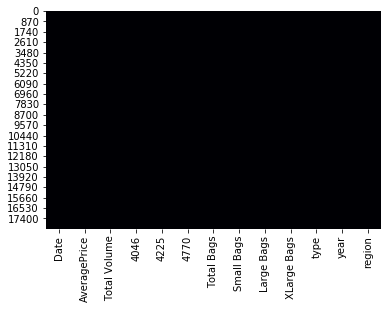

In [7]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

- NO NULL VALUES PRESENT IN THE DATASET

# <center>5.1 Groupby in Python</center>


- It is a method used to split or create groups in a dataframe.
- This helps us to pinpoint data and process the data for analysis.

We will use groupby for the following features in the dataset : 
- year
- type
- region
- [year , type] **(Pair)**

In [8]:
df1 = data.groupby(by = 'year')
df2 = data.groupby(by = 'type')
df3 = data.groupby(by = 'region')
df4 = data.groupby(by = ['year','type'])

## 5.1.1 DISPLAY THE GROUPBY DATAFRAME

In [9]:
df1.first()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
year,,,,,,,,,,,,
2015,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,Albany
2016,2016-12-25,1.52,73341.73,3202.39,58280.33,426.92,11432.09,11017.32,411.83,2.94,conventional,Albany
2017,2017-12-31,1.47,113514.42,2622.70,101135.53,20.25,9735.94,5556.98,4178.96,0.00,conventional,Albany
2018,2018-03-25,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.00,conventional,Albany


In [10]:
df2.first()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
type,,,,,,,,,,,,
conventional,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
organic,2015-12-27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,2015,Albany


## 5.1.2 PINPOINT SPECIFIC DATA 

In [11]:
df3.get_group('Albany')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17608,2018-02-04,1.52,4124.96,118.38,420.36,0.00,3586.22,3586.22,0.00,0.0,organic,2018,Albany
17609,2018-01-28,1.32,6987.56,433.66,374.96,0.00,6178.94,6178.94,0.00,0.0,organic,2018,Albany
17610,2018-01-21,1.54,3346.54,14.67,253.01,0.00,3078.86,3078.86,0.00,0.0,organic,2018,Albany
17611,2018-01-14,1.47,4140.95,7.30,301.87,0.00,3831.78,3831.78,0.00,0.0,organic,2018,Albany


In [12]:
df4.get_group((2017,'conventional'))

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
5616,2017-12-31,1.47,113514.42,2622.70,101135.53,20.25,9735.94,5556.98,4178.96,0.00,conventional,2017,Albany
5617,2017-12-24,1.45,77039.09,2811.71,58592.23,19.06,15616.09,6863.18,8752.91,0.00,conventional,2017,Albany
5618,2017-12-17,1.43,70677.56,2578.95,50811.52,79.18,17207.91,8914.13,8293.78,0.00,conventional,2017,Albany
5619,2017-12-10,1.29,92325.53,3220.05,75147.56,104.36,13853.56,7268.21,6585.35,0.00,conventional,2017,Albany
5620,2017-12-03,1.39,139970.00,3772.00,126551.00,136.00,9511.00,7061.00,2450.00,0.00,conventional,2017,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8473,2017-01-29,0.74,979146.85,607131.32,61234.48,15028.65,295752.40,159375.80,136376.60,0.00,conventional,2017,WestTexNewMexico
8474,2017-01-22,0.67,1100953.14,653900.04,95147.87,14466.07,337439.16,113880.30,223558.86,0.00,conventional,2017,WestTexNewMexico
8475,2017-01-15,0.73,1068598.28,565135.47,98377.69,17186.36,387898.76,153857.94,234040.82,0.00,conventional,2017,WestTexNewMexico
8476,2017-01-08,0.76,954821.31,486063.56,102288.73,15502.82,350966.20,151408.26,199527.38,30.56,conventional,2017,WestTexNewMexico


# <center>5.2 Correlation</center>

- Correlation is one of the techniques used for feature selection.
- It tells us about the interdependencies between features and helps us in building model.
- Positive & Negative correlation provides us with great insight for model building.

### 2 COMMON CORRELATION METHODS

- **PEARSON METHOD** :- It displays the linear relationship between features.
- **SPEARMAN METHOD** :- It displays the non-linear relationship between features.

We can also find correlation between features using **numpy** and **scipy** libraries.

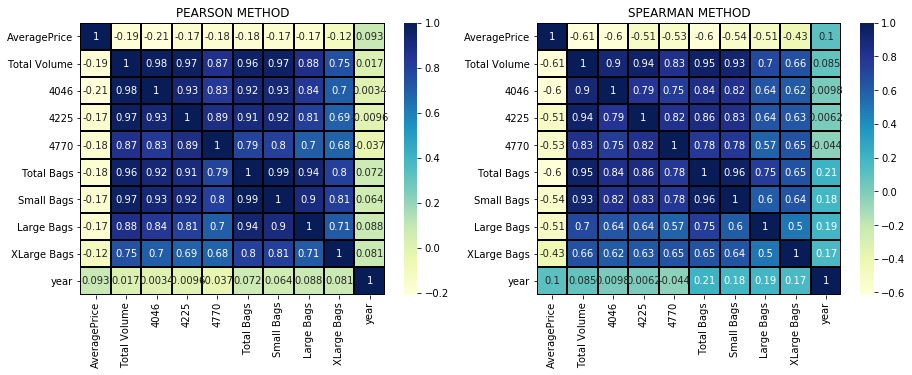

In [13]:
ax,fig = plt.subplots(ncols = 2,nrows = 1,figsize = (15,5))

plt.subplot(1,2,1)
plt.title('PEARSON METHOD')
sns.heatmap(data.corr(method = 'pearson'),cmap = 'YlGnBu',cbar = True,annot = True,linecolor = 'black',linewidths = 1);

plt.subplot(1,2,2)
plt.title('SPEARMAN METHOD')
sns.heatmap(data.corr(method = 'spearman'),cmap = 'YlGnBu',cbar = True,annot = True,linecolor = 'black',linewidths = 1);
plt.show()

## 5.2.1 UPPER TRIANGULAR & LOWER TRIANGULAR FORMAT

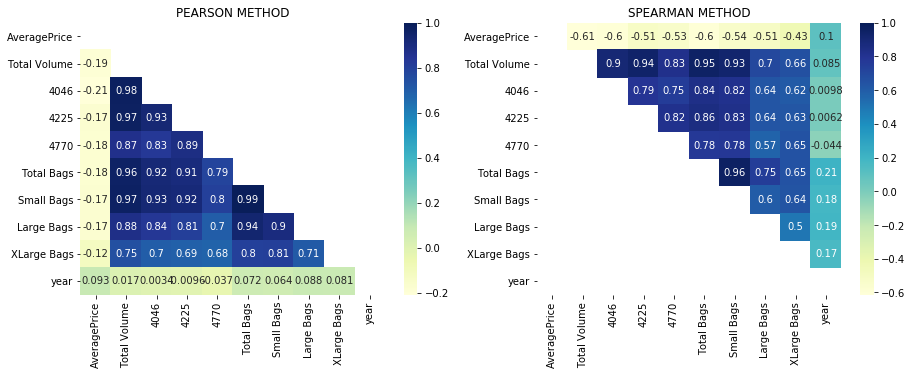

In [14]:
matrix = np.triu(data.corr(method = 'pearson'))
mask = np.tril(data.corr(method = 'spearman'))
ax,fig = plt.subplots(ncols = 2,nrows = 1,figsize = (15,5))
plt.subplot(1,2,1)
plt.title('PEARSON METHOD')
sns.heatmap(data.corr(method = 'pearson'),cmap = 'YlGnBu',cbar = True,annot = True,mask=matrix);

plt.subplot(1,2,2)
plt.title('SPEARMAN METHOD')
sns.heatmap(data.corr(method = 'spearman'),cmap = 'YlGnBu',cbar = True,annot = True,mask = mask);
plt.show()

- From the correlation matrix, we can find the interrelated features and do **feature selection** for our model

# <center>5.3 Analysis Of Variance [ ANOVA ]</center>

- The one-way ANOVA is a test that is used to determine if there are significant differences between features.
- It makes use of 1 categorical and 1 continuous feature.
- It tells us the relationship between the categorical and continuous features.
- Its output is a multiple statistical test results which provide us with valuable insight.
- **p value** = Significance value which helps in decision making for hypothesis testing.
- **p value** is the most important output of ANOVA test as it helps us to determine which hypothesis to select. 

## 5.3.1 USING PINGOUIN

**PIP COMMAND** :- !pip install pingouin

In [15]:
import pingouin as pg

C:\Users\DELL\anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
C:\Users\DELL\anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [16]:
aov = pg.anova(dv='AveragePrice', between='year', data=data, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,year,103.247475,3,34.415825,219.886771,3.889592e-140,0.034894
1,Within,2855.636680,18245,0.156516,NaN,NaN,NaN


- HYPOTHESIS TESTING IS THE PROCESS TO CREATE ASSUMPTIONS OF OUR  FEATURES AND THEN DECIDE WHETHER TO SELECT OR NOT USING STATISTICAL TESTS.
- **ANOVA TEST, CHI SQUARE TEST, T-TEST** USED IN HYPOTHESIS TESTING

## 5.3.2 USING STATSMODEL 
**PIP COMMAND** :- !pip install statsmodels

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
model = ols('AveragePrice ~ year', data = data).fit()

In [19]:
aov = sm.stats.anova_lm(model, typ=2)
aov

,sum_sq,df,F,PR(>F)
year,25.699914,1.0,159.876195,1.713145e-36
Residual,2933.184241,18247.0,NaN,NaN


- **p value** > 0.05 = We reject the alternate hypothesis & select the null hypothesis
- **p value** < 0.05 = We reject the null hypothesis & select the alternate hypothesis
- OTHER STATISTICAL PARAMETERS IN ANOVA OUTPUT TELL US ABOUT THE DIFFERENCES BETWEEN THE FEATURES SELECTED. 

# <center>END</center>

## CREATED BY :-

- **NAME** : TANMAY S. DESHPANDE
- **COLLEGE** : PVG's COET & GKP IM , PUNE
- **ACADEMIC YEAR** : 2020-21 [B.E]
- **LINKED IN** : https://www.linkedin.com/in/tanmay-deshpande-1211ab1aa/?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base%3Brkq3xsN4Q%2BiJwS7Ryv59pQ%3D%3D
- **GITHUB ID** : https://github.com/TANMAY0189